## Boston Housing dataset 
The following notebook analyzes the Boston Housing dataset with KNN and linear regression algorithms, and compare the results obtained.

#### (I) <a href='#link1'>KNN</a>
KNN was manually created to observe the effects of k, L, and the number of features. Cross-validation and forward selection of features using linear regression, the lowest RMSE score of 3.61 is obtained.
#### (II) <a href='#link2'>Linear regression</a>
Standardized and non-standardized linear regression performed to compare results of gradient descent and time taken for convergence. Overfitting of training data was intentionally performed with all features and interaction effects taken into account, then regularization is performed for comparison.

Linear regression had a better performance.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import sklearn
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time

### Loading and observations on Boston housing dataset

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

In [4]:
boston = pd.DataFrame(bdata.data)
boston.columns = bdata.feature_names[:]
boston["MEDV"] = bdata.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
tot_variables, tot_observation = boston.shape
print("There are {} total variables.".format(tot_variables))
print("There are {} total observations.".format(tot_observation))

There are 506 total variables.
There are 14 total observations.


In [6]:
# check for null values
print(boston.isnull().any().any())

False


In [7]:
stats = pd.DataFrame({
        'Observations': boston.count(),
        'Mean': boston.mean(),
        'SD': boston.std(),
        'Min': boston.min(),
        'Median': boston.median(),
        'Max': boston.max(),
    })

In [8]:
stats

,Observations,Mean,SD,Min,Median,Max
CRIM,506,3.593761,8.596783,0.00632,0.25651,88.9762
ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


Text(0.5,1,'Histogram of Median Housing Prices (in thousands)')

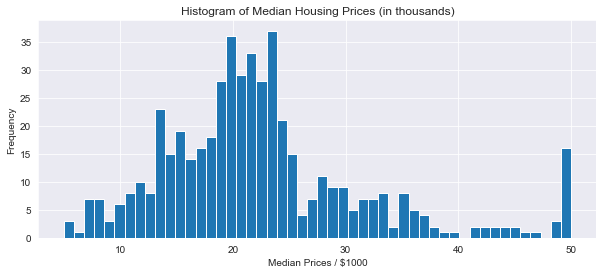

In [9]:
plt.figure(figsize=(10,4))
plt.hist(bdata.target, bins=50)
plt.xlabel("Median Prices / $1000")
plt.ylabel("Frequency")
plt.title("Histogram of Median Housing Prices (in thousands)")

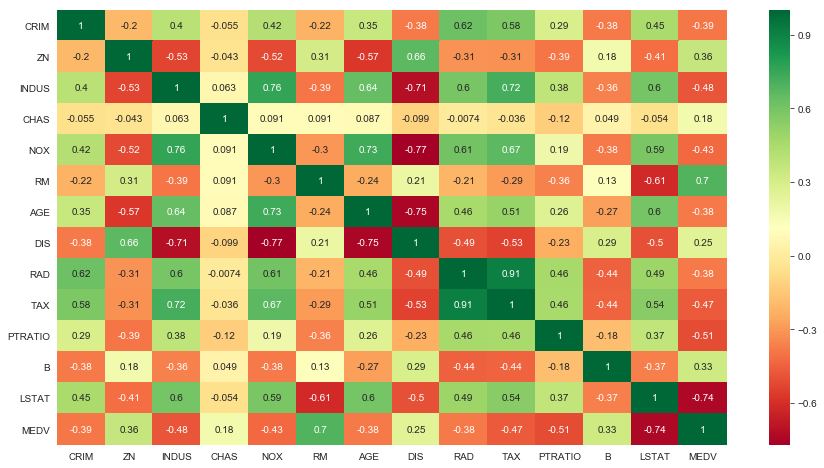

In [10]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(boston.corr(), cmap = "RdYlGn", annot = True)

C:\Users\Wei Tan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Wei Tan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Wei Tan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Wei Tan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


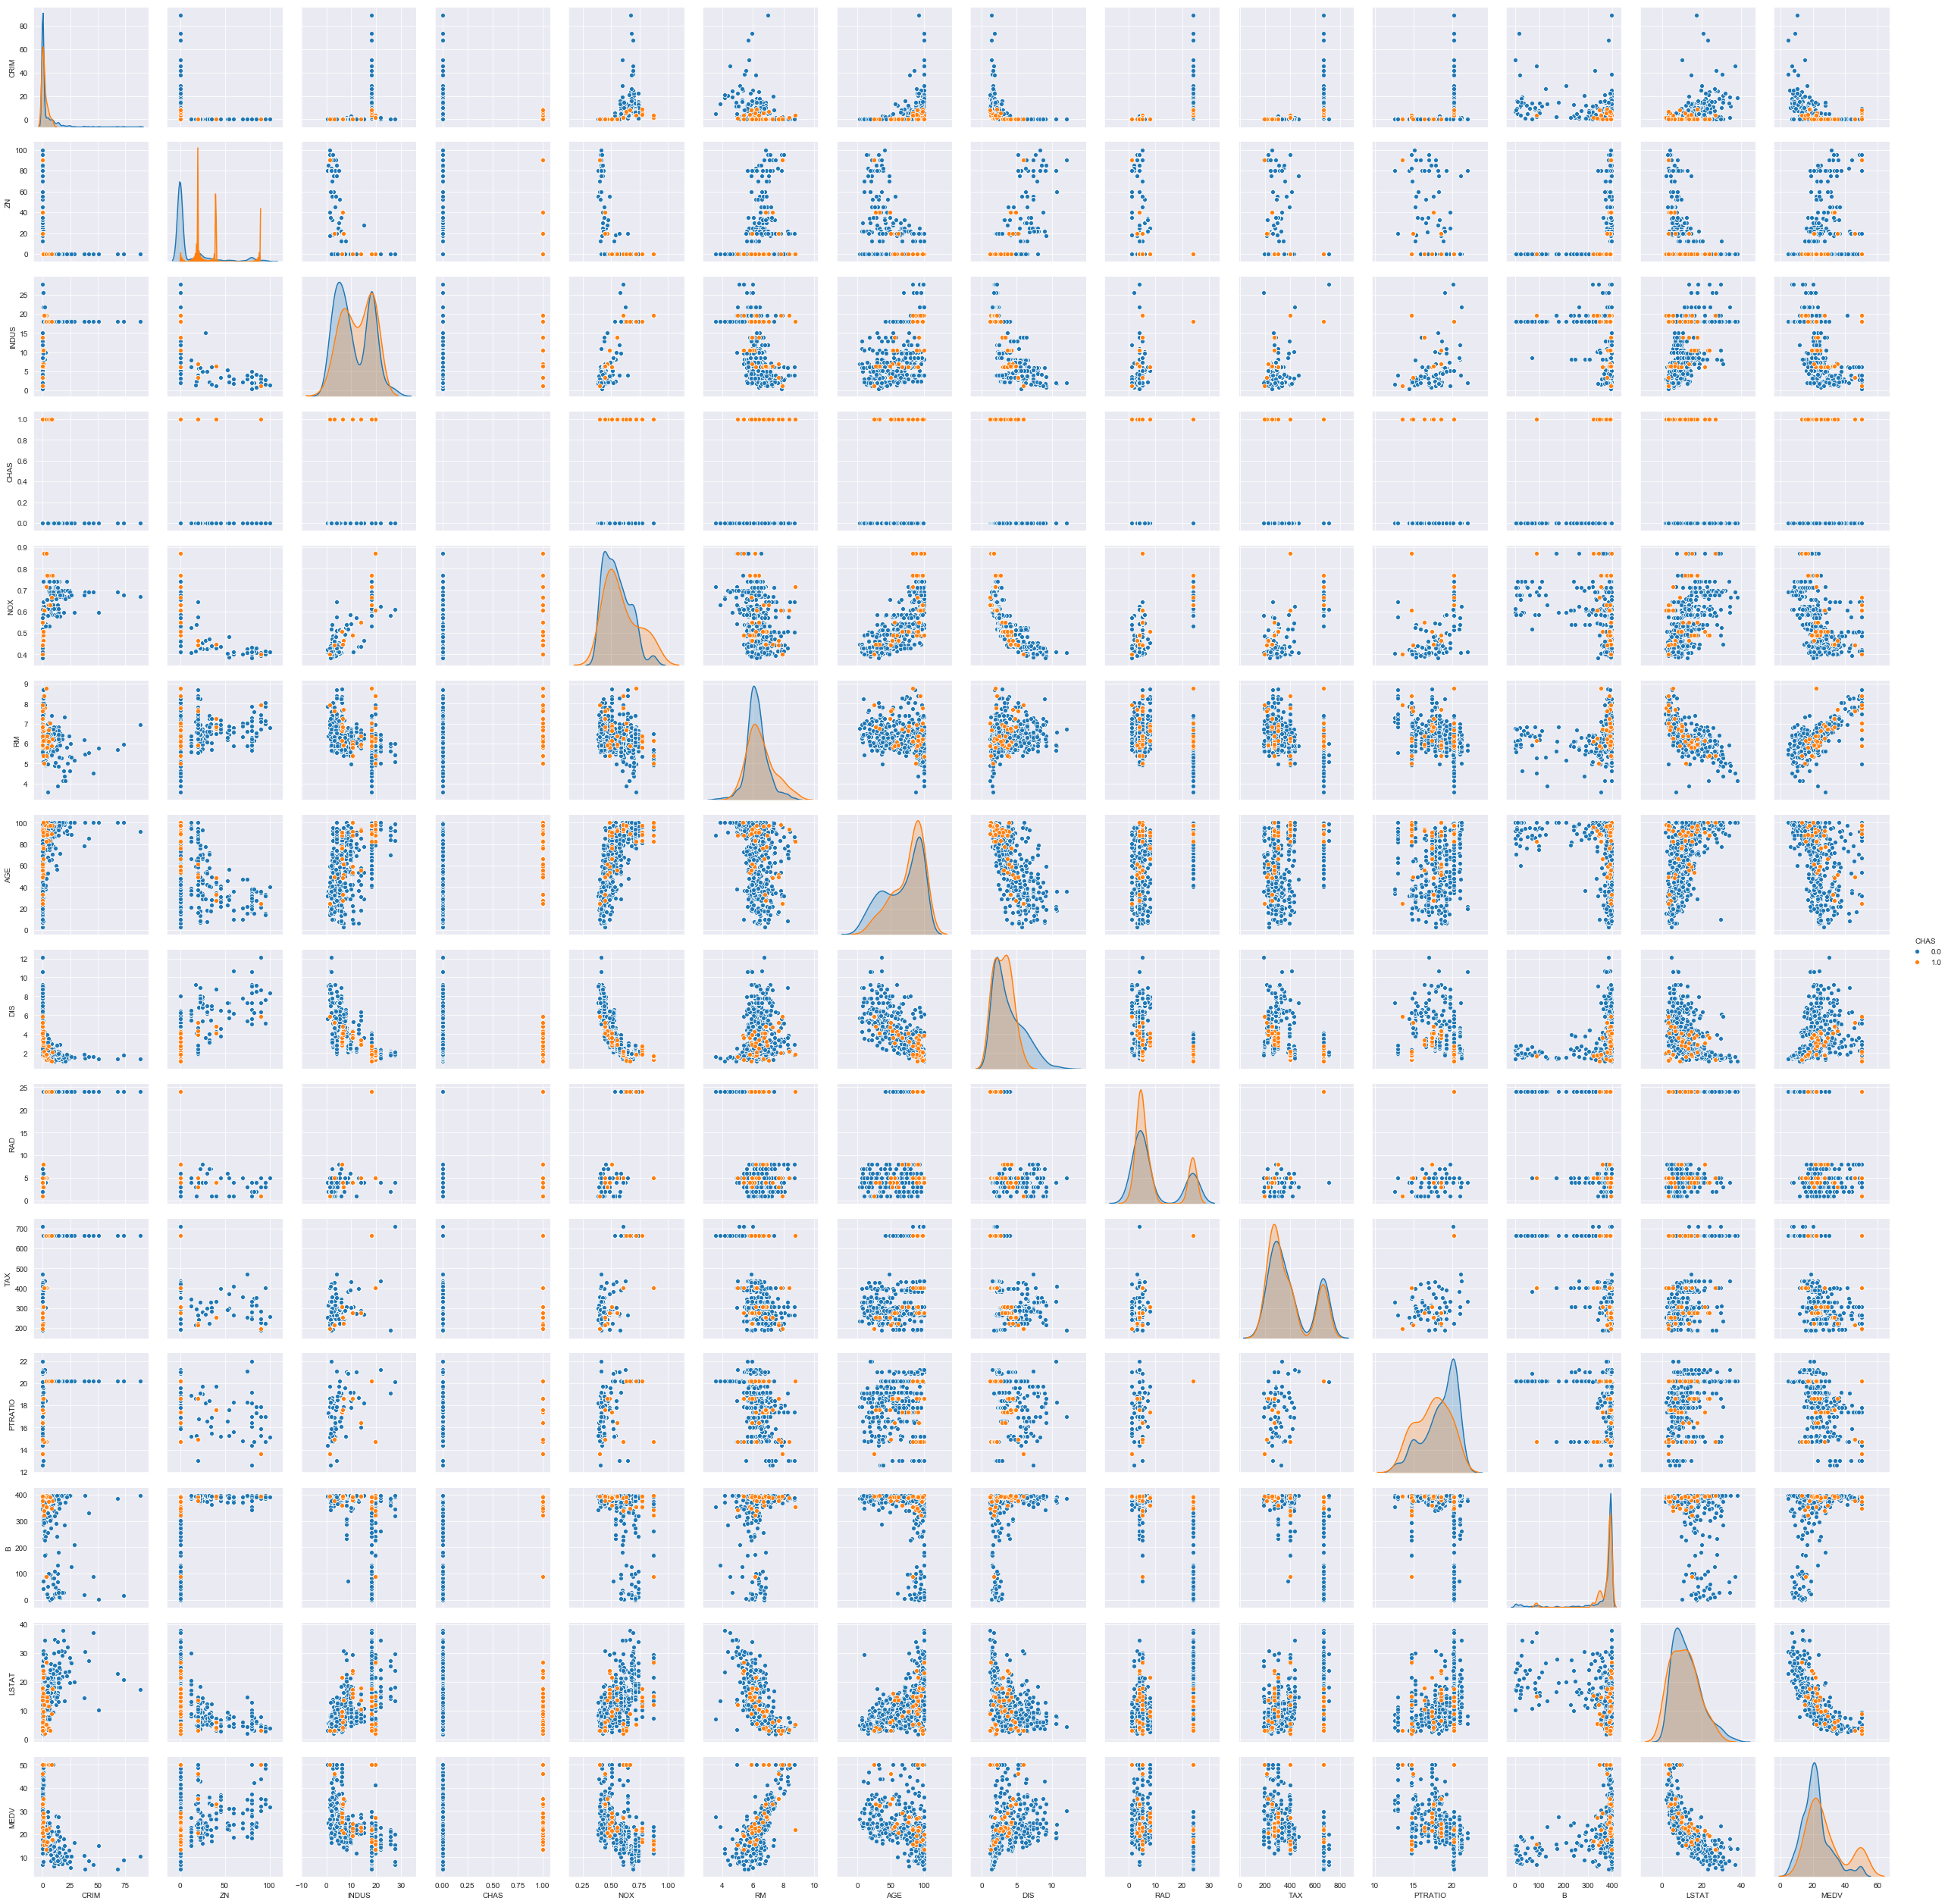

In [11]:
sns.pairplot(boston, hue = "CHAS")

In [12]:
np.random.seed(seed=2019)

X_train, X_test, y_train, y_test = train_test_split(bdata.data, bdata.target, test_size=0.2)
bdata_train = pd.DataFrame(X_train)
bdata_train.columns = bdata.feature_names[:]
bdata_train["MEDV"] = y_train 
print(bdata_train.shape)

bdata_test = pd.DataFrame(X_test)
bdata_test.columns = bdata.feature_names[:]
bdata_test["MEDV"] = y_test

(404, 14)


In [13]:
print("Training shape : " + str(X_train.shape))
print("Testing shape : " + str(X_test.shape))

Training shape : (404, 13)
Testing shape : (102, 13)


### Baseline for model -- Mean for training data

In [14]:
def compute_rmse(predictions, yvalues):
    
    predictions = np.array(predictions)
    yvalues = np.array(yvalues)
    sqdiff = (predictions - yvalues)**2
    rmse = np.sqrt(sum(sqdiff)/len(predictions))

    return round(rmse, 2)

Training mean price = 22.79.
Mean rmse of training set : 9.39
Mean rmse of testing set : 8.37


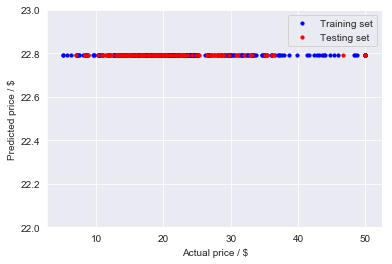

In [15]:
# create model using training set mean
training_meanprice = bdata_train["MEDV"].mean()
print("Training mean price = {:.2f}.".format(training_meanprice))

# calculate rmse for train and test
train_rmse = compute_rmse(bdata_train["MEDV"], training_meanprice)
test_rmse = compute_rmse(bdata_test["MEDV"], training_meanprice)

# compare mean rmse for train and test
print("Mean rmse of training set : {}".format(train_rmse))
print("Mean rmse of testing set : {}".format(test_rmse))

# create scatter plot
fig = plt.figure(figsize=(6,4))
bdata_train["PREDICTED"] = training_meanprice
bdata_test["PREDICTED"] = training_meanprice

plt.scatter(bdata_train["MEDV"], bdata_train["PREDICTED"], s=10, color="blue", label="Training set")
plt.scatter(bdata_test["MEDV"], bdata_test["PREDICTED"], s=10, color="red", label="Testing set")
plt.ylabel("Predicted price / $")
plt.xlabel("Actual price / $")
plt.ylim(22,23)
plt.legend()

### K Nearest Neighbors
<a id='link1'></a>

In [16]:
"""
This function calculates the predicted prices taking in the training/testing data, features, L-value and K-value as 
input parameters. When predicting prices of the training data, the next closest neighbor is selected to prevent the same 
point from being selected - since RMSE will be zero in that case.

Function
--------
nneighbor

Given two arrays, test and train data, along with the selected features, L and K values.
Compute the predicted prices.

Parameters
----------
test_data : array
    Array of numerical values corresponding to the test data.

train_data : array
    Array of numerical values corresponding to the train data.

features : list
    A list of selected features to use in model.
    
L : int
    Value of L to use in computing distances.
    
K : int
    The number of nearest neighbors used in model.
    
Returns
-------

all_predicted_prices : list
    List of predicted prices

-------

"""

def nneighbor(test_data, train_data, features, L, K):

    all_predicted_prices = []

    train = np.array(train_data[features])
    
    for index, row in test_data.iterrows():
        test = np.array(row[features])
        dist = np.sum(abs(test - train)**L, axis=1) **(1/L) 
        sort_dist_idx = np.argsort(dist)

        # check if data sets are the same, i.e. comparing training to training
        if np.array_equal(test_data, train_data):
            k_idx_list = sort_dist_idx[1 : 1 + K]
            list_rows = train_data.iloc[np.r_[k_idx_list],:]
            predicted_price = round(np.mean(list_rows["MEDV"]), 2)
            
        else:
            k_idx_list = sort_dist_idx[0 : 0 + K]
            list_rows = train_data.iloc[np.r_[k_idx_list],:]
            predicted_price = round(np.mean(list_rows["MEDV"]), 2)
        
        all_predicted_prices.append(predicted_price)

    return all_predicted_prices

In [17]:
test_predicted_prices = nneighbor(bdata_test, bdata_train, ["CRIM","RM"], 2, 1)
print("Test RMSE : " + str(compute_rmse(test_predicted_prices, y_test)))

Test RMSE : 7.4


In [18]:
train_predicted_prices = nneighbor(bdata_train, bdata_train, ["CRIM","RM"], 2, 1)
print("Train RMSE : " + str(compute_rmse(train_predicted_prices, y_train)))

Train RMSE : 7.28


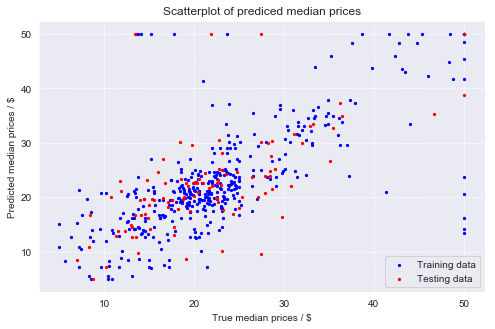

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(bdata_train["MEDV"], train_predicted_prices, s=5, color="blue", label="Training data")
plt.scatter(bdata_test["MEDV"], test_predicted_prices, s=5, color="red", label="Testing data")
plt.legend()
plt.grid(True, linestyle="--")
plt.title("Scatterplot of prediced median prices")
plt.ylabel("Predicted median prices / $")
plt.xlabel("True median prices / $")
plt.show()

### Results and normalization

In [20]:
"""
This function normalizes the input data using the mean and standard deviation of the training data set.

Function
--------
normalize

Given two arrays, raw data and train data.
Compute the normalized data.

Parameters
----------
raw_data : array
    Array of numerical values to normalize.

train_data : array
    Array of numerical values corresponding to the train data, which will be used as reference to normalize raw_data.

Returns
-------

normalized_data : dataframe
    dataframe of normalized data

"""
def normalize(raw_data, train_data):
    
    mean_train = train_data.mean()
    std_train = train_data.std()
    normalized_data = (raw_data - mean_train) / (std_train)
    
    return normalized_data

In [21]:
norm_test = normalize(bdata_test[["CRIM","RM"]], bdata_train[["CRIM", "RM"]])
norm_test["MEDV"] = bdata_test[["MEDV"]]

norm_train = normalize(bdata_train[["CRIM", "RM"]], bdata_train[["CRIM", "RM"]])
norm_train["MEDV"] = bdata_train[["MEDV"]]

In [22]:
testnorm_predicted_prices = nneighbor(norm_test, norm_train, ["CRIM","RM"], 2, 1)
print("Test RMSE : {:.2f}. ".format(compute_rmse(testnorm_predicted_prices, norm_test["MEDV"])))

trainnorm_predicted_prices = nneighbor(norm_train, norm_train,["CRIM","RM"], 2, 1)
print("Train RMSE : {:.2f}. ".format(compute_rmse(trainnorm_predicted_prices, norm_train["MEDV"])))

Test RMSE : 6.17. 
Train RMSE : 7.69. 


### Optimization
Increase the performance of nearest neighbor algorithm by adding features and using different values of L in the distance function.

In [23]:
# normalize data
feats = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
normtest_all = normalize(bdata_test[feats],
                      bdata_train[feats])

normtrain_all = normalize(bdata_train[feats],
                      bdata_train[feats])

normtest_all["MEDV"] = bdata_test[["MEDV"]]
normtrain_all["MEDV"] = bdata_train[["MEDV"]]
normtrain_all.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.395759,0.457397,-0.755827,-0.26194,-1.061567,0.614742,-1.814140,1.884859,-0.270251,-0.446662,0.312846,0.391593,-0.843944,26.2
1,-0.413229,0.414085,-0.787643,-0.26194,-0.992015,-0.261264,-0.182265,1.411904,-0.619072,-0.965663,-0.730573,0.394176,-0.438306,20.5
2,-0.240973,-0.495455,1.228325,-0.26194,2.763792,-1.294167,1.144754,-1.029578,-0.502798,-0.011178,-1.683260,-0.194101,0.105842,19.6
3,0.256420,-0.495455,1.014291,-0.26194,0.259920,-0.262717,0.420273,-0.116061,1.706406,1.557757,0.811873,0.379686,0.346115,19.1
4,-0.379194,-0.495455,-0.706657,-0.26194,-0.400823,-0.303394,-0.236063,-0.066513,-0.153977,-0.583869,-0.458377,0.200743,-0.233367,24.0


#### Comparison with different features

In [24]:
start_time = time.time()
testnorm_2features = nneighbor(normtest_all, normtrain_all, ["RM","LSTAT"], 2, 1)
print("Time taken : {:.2f} seconds".format(time.time() - start_time))
print("RMSE of Testing is {:.2f}. ".format(compute_rmse(testnorm_2features, normtest_all["MEDV"])))

start_time = time.time()
trainnorm_2features = nneighbor(normtrain_all, normtrain_all, ["RM","LSTAT"], 2, 1)
print("Time taken : {:.2f} seconds".format(time.time() - start_time))
print("RMSE of Training is {:.2f}. ".format(compute_rmse(trainnorm_2features, normtrain_all["MEDV"])))

Time taken : 0.46 seconds
RMSE of Testing is 6.58. 
Time taken : 1.20 seconds
RMSE of Training is 6.05. 


In [25]:
start_time = time.time()
testnorm_4features = nneighbor(normtest_all, normtrain_all, ["RM", "LSTAT", "CRIM", "NOX", "PTRATIO"], 2, 1)
print("RMSE of Testing is {:.2f}. ".format(compute_rmse(testnorm_4features, normtest_all["MEDV"])))

trainnorm_4features = nneighbor(normtrain_all, normtrain_all, ["RM", "LSTAT", "CRIM", "NOX", "PTRATIO"], 2, 1)
print("RMSE of Training is {:.2f}. ".format(compute_rmse(trainnorm_4features, normtrain_all["MEDV"])))

RMSE of Testing is 5.39. 
RMSE of Training is 4.08. 


#### Comparing with different L values

In [26]:
testnorm_L1 = nneighbor(normtest_all, normtrain_all, ["RM", "LSTAT", "CRIM", "NOX", "PTRATIO"], 1, 1)
print("RMSE of Testing with L=1 is {:.2f}. ".format(compute_rmse(testnorm_L1, normtest_all["MEDV"])))

testnorm_L2 = nneighbor(normtest_all, normtrain_all, ["RM", "LSTAT", "CRIM", "NOX", "PTRATIO"], 2, 1)
print("RMSE of Testing with L=2 is {:.2f}. ".format(compute_rmse(testnorm_L2, normtest_all["MEDV"])))

start_time = time.time()
testnorm_L3 = nneighbor(normtest_all, normtrain_all, ["RM", "LSTAT", "CRIM", "NOX", "PTRATIO"], 3, 1)
print("RMSE of Testing with L=3 is {:.2f}. ".format(compute_rmse(testnorm_L3, normtest_all["MEDV"])))

print("\n")

trainnorm_L1 = nneighbor(normtrain_all, normtrain_all, ["RM", "LSTAT", "CRIM", "NOX", "PTRATIO"], 1, 1)
print("RMSE of Training with L=1 is {:.2f}. ".format(compute_rmse(trainnorm_L1, normtrain_all["MEDV"])))

trainnorm_L2 = nneighbor(normtrain_all, normtrain_all, ["RM", "LSTAT", "CRIM", "NOX", "PTRATIO"], 2, 1)
print("RMSE of Training with L=2 is {:.2f}. ".format(compute_rmse(trainnorm_L2, normtrain_all["MEDV"])))

trainnorm_L3 = nneighbor(normtrain_all, normtrain_all, ["RM", "LSTAT", "CRIM", "NOX", "PTRATIO"], 3, 1)
print("RMSE of Training with L=3 is {:.2f}. ".format(compute_rmse(trainnorm_L3, normtrain_all["MEDV"])))

RMSE of Testing with L=1 is 5.10. 
RMSE of Testing with L=2 is 5.39. 
RMSE of Testing with L=3 is 5.28. 


RMSE of Training with L=1 is 4.13. 
RMSE of Training with L=2 is 4.08. 
RMSE of Training with L=3 is 4.38. 


#### Comparing CRIM and RM for cross-validation

In [27]:
bdata_cv= pd.DataFrame(bdata.data)
bdata_cv.columns = bdata.feature_names[:]
bdata_cv["MEDV"] = bdata.target

bdata_cv = bdata_cv[["CRIM", "RM", "MEDV"]]
num_rows = bdata_cv.shape[0]

In [28]:
np.random.seed(2019)

start_time = time.time()
rand_df = bdata_cv.take(np.random.permutation(num_rows))  # randomly jumble up rows
rand_df = rand_df[:num_rows-num_rows%10]   # randomly drop last 6 rows to have 10 equally-sized samples
num_insets = rand_df.shape[0]//10   # number of samples in a set

set_indicator = 1
rmse_all = []

for i in range(10):   # split and loop through each fold

    fromidx = i*num_insets
    toidx = i*num_insets+num_insets
    samples_test = rand_df[fromidx:toidx]
    samples_train = rand_df.drop(axis=0,index=samples_test.index)
    # normalize train and test data
    norm_sampletest = normalize(samples_test[["CRIM", "RM"]], samples_train[["CRIM", "RM"]])
    norm_sampletest["MEDV"] = samples_test["MEDV"]
    norm_sampletrain = normalize(samples_train[["CRIM", "RM"]], samples_train[["CRIM", "RM"]])
    norm_sampletrain["MEDV"] = samples_train["MEDV"]
    
    set_predicted_prices = nneighbor(norm_sampletest, norm_sampletrain,["CRIM","RM"], 2, 1)
    set_rmse = compute_rmse(set_predicted_prices, norm_sampletest["MEDV"])
    rmse_all.append(set_rmse)
    
    print("Set {} has an RMSE of {}.".format(set_indicator, set_rmse))
    set_indicator += 1

average_rmse = np.mean(rmse_all)
print("\nTime taken : {:.2f} seconds".format(time.time() - start_time))

print("Average RMSE is {:.2f}.".format(average_rmse))

Set 1 has an RMSE of 5.41.
Set 2 has an RMSE of 6.73.
Set 3 has an RMSE of 4.92.
Set 4 has an RMSE of 7.19.
Set 5 has an RMSE of 4.47.
Set 6 has an RMSE of 9.87.
Set 7 has an RMSE of 6.75.
Set 8 has an RMSE of 8.4.
Set 9 has an RMSE of 9.32.
Set 10 has an RMSE of 4.87.

Time taken : 1.76 seconds
Average RMSE is 6.79.


In [29]:
"""
This function takes in the data, selected features, L value and K value as input parameters, and returns the average rmse of
the test. The nneighbors and normalization functions above are utilized in this function.

In this function, the rows of the data is randomized and split into 10 folds, dropping the remaining rows to keep the size of each fold consistent.
Each fold is used as a testing set, with the remaining 9 folds treated as the training data. This process is repeated 10 
times with a different fold used each time, and the RMSE is calculated using the mean of all RMSEs.

Function
--------
knn

Given an array, along with the selected features, L and K values.
Compute the average rmse value.

Parameters
----------
full_data : array
    Array of numerical values for knn modeling.

features : list
    A list of selected features to use in model.
    
L : int
    Value of L to use in computing distances.
    
K : int
    The number of nearest neighbors used in model.
    
Returns
-------

average_rmse : float
    Average rmse from 10-fold knn modeling.

"""
def knn(full_data, features, L, K):
    
    num_rows = full_data.shape[0]
    np.random.seed(2019) 

    rand_df = full_data.take(np.random.permutation(num_rows))  # randomly jumble up rows
    rand_df = rand_df[:num_rows-num_rows%10]   # randomly drop last few rows to have 10 equally-sized samples
    num_insets = rand_df.shape[0]//10   # number of samples in a set

    set_indicator = 1
    rmse_all = []

    for i in range(10):   # split and loop through each fold

        fromidx = i*num_insets
        toidx = i*num_insets+num_insets
        samples_test = rand_df[fromidx:toidx]
        samples_train = rand_df.drop(axis=0,index=samples_test.index)
        norm_sampletest = normalize(samples_test[features], samples_train[features])
        norm_sampletest["MEDV"] = samples_test["MEDV"]
        norm_sampletrain = normalize(samples_train[features], samples_train[features])
        norm_sampletrain["MEDV"] = samples_train["MEDV"]
    
        set_predicted_prices = nneighbor(norm_sampletest, norm_sampletrain, features, L, K)
        
        set_rmse = compute_rmse(set_predicted_prices, norm_sampletest["MEDV"])
        rmse_all.append(set_rmse)
    
#         print("Set {} has an RMSE of {}.".format(set_indicator, set_rmse))
        set_indicator += 1

    average_rmse = np.mean(rmse_all)
#     print("Average RMSE is {:.2f}.".format(average_rmse))
     
    return average_rmse


In [30]:
start_time = time.time()
print("Average RMSE is {:.2f}".format(knn(boston, ["CRIM","RM"], 2, 3)))
print("Time taken : {:.2f} seconds".format(time.time() - start_time))

Average RMSE is 5.44
Time taken : 1.74 seconds


#### Observe performance with increasing k value

In [31]:
k_value = []
k_rmse = []

for k in range(1,26):
    average_k_rmse = knn(boston, ["CRIM", "ZN", "RM", "AGE", "DIS", "TAX"], 2, k)
    k_value.append(k)
    k_rmse.append(average_k_rmse)

Text(0.5,1,'Scatterplot on K against Average RMSE')

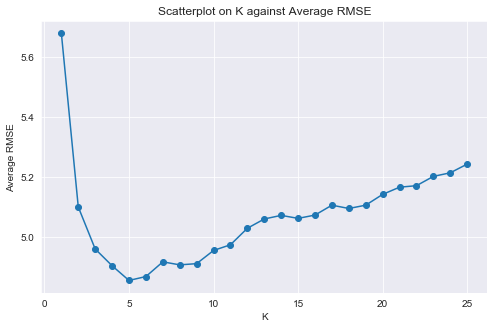

In [32]:
plt.figure(figsize=(8,5))
plt.plot(k_value, k_rmse,"o-")
plt.xlabel("K")
plt.ylabel("Average RMSE")
plt.title("Scatterplot on K against Average RMSE")

Optimal value of k is 5, to minimize overfitting and underfitting.

### Forward selection

In [33]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT"
ols_mod = smf.ols(formula, data=boston, missing='drop').fit()
print(ols_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          6.95e-135
Time:                        19:58:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

In [34]:
rmse1 = knn(boston, ["LSTAT"], 2, 5)

# variables are listed from lowest to highest p-values (highest to lowest magnitude of t-values)
list_var = ["LSTAT", "RM", "DIS", "PTRATIO", "NOX", "RAD", "B", "ZN", "TAX", "CRIM", "CHAS", "INDUS", "AGE"]
rmse_knn = []

for i in range(1, 14):
    rmse_test = knn(boston, list_var[:i] , 2, 5)
    rmse_knn.append(round(rmse_test,2))
    
rmse_knn

[5.58, 4.4, 4.23, 3.9, 3.83, 3.94, 3.54, 3.68, 3.52, 3.57, 4.16, 4.3, 4.34]

In [78]:
min(rmse_knn)

3.52

Text(0.5,0,'Variables added')

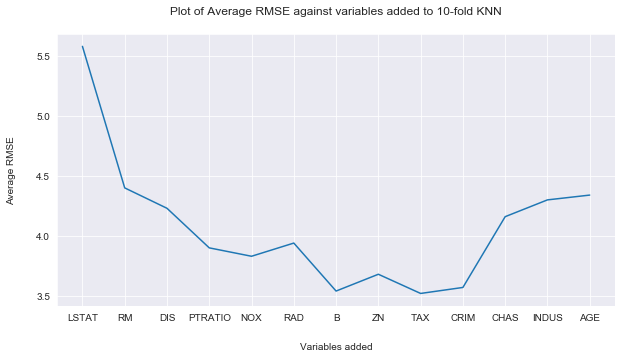

In [35]:
plt.figure(figsize=(10,5))
plt.plot(rmse_knn)
plt.xticks(range(0,13,1), list_var)
plt.title("Plot of Average RMSE against variables added to 10-fold KNN", y=1.05)
plt.ylabel("Average RMSE", labelpad=20)
plt.xlabel("Variables added", labelpad=20)

Lowest RMSE of 3.52 is achieve with features LSTAT, RM, DIS, PTRATIO, NOX, RAD, B used and a k-value of 5.

### Linear Regression
<a id='link2'></a>

In [36]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [46]:
regr_1 = LinearRegression()
regr_1.fit(boston[['RM']], boston['MEDV'])
r_1 = regr_1.score(boston[['RM']], boston['MEDV'])
predict1 = regr_1.predict(boston[['RM']])

print('First regression')
print('Coefficient: {:.2f}'.format(regr_1.coef_[0]))
print('Intercept: {:.2f}'.format(regr_1.intercept_))
print('R square: {:.2f}'.format(r_1))
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(predict1, boston["MEDV"]))))

boston['RM_square'] = boston['RM'] ** 2

regr_2 = LinearRegression()
regr_2.fit(boston[['RM', 'RM_square']], boston['MEDV'])
r_2 = regr_2.score(boston[['RM', 'RM_square']], boston['MEDV'])
predict2 = regr_2.predict(boston[['RM', 'RM_square']])
print('\nSecond regression')
print('Coefficient of RM: {:.2f}'.format(regr_2.coef_[0]))
print('Coefficient of RM square: {:.2f}'.format(regr_2.coef_[1]))
print('Intercept: {:.2f}'.format(regr_2.intercept_))
print('R square: {:.2f}'.format(r_2))
print('RMSE : {:.2f}'.format(np.sqrt(mean_squared_error(predict2, boston["MEDV"]))))

First regression
Coefficient: 9.10
Intercept: -34.67
R square: 0.48
RMSE : 6.60

Second regression
Coefficient of RM: -22.64
Coefficient of RM square: 2.47
Intercept: 66.06
R square: 0.55
RMSE : 6.17


In the bivariate linear regression, we estimate that the median housing price will increase by roughly $9100 for each additional room in the house.

Using the second model, we observe a quadratic relationship between median housing price and number of rooms.  The positive quadratic term and negative linear term indicate convex curvature, i.e. housing price increases more steeply for houses with a greater number of rooms.

The second regression can explain more variability of median housing price. Adding variables to a regression will usually increase the R square.

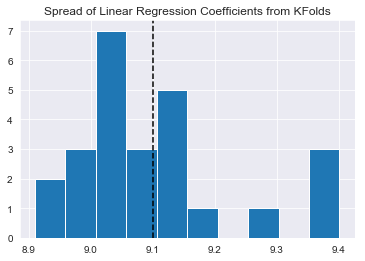

In [51]:
# perform cv to prevent overfitting

from sklearn.cross_validation import KFold

kf = KFold(n=506, n_folds=25, shuffle=True, random_state=10)

all_coeff = []
all_intercept = []

for idxtrain, idxtest in kf:
    train = boston.iloc[idxtrain]
    test = boston.iloc[idxtest]
    reg = regr_1.fit(train[["RM"]], train["MEDV"])
    coef = reg.coef_
    yintercept = reg.intercept_
    all_coeff.append(coef[0].tolist())
    all_intercept.append(yintercept.tolist())

plt.hist(all_coeff)
plt.axvline(9.1, c="black", linestyle="--")
plt.title("Spread of Linear Regression Coefficients from KFolds")
plt.show()

Text(0.5,1,'Scatterplot of Median Housing Value against Number of Rooms')

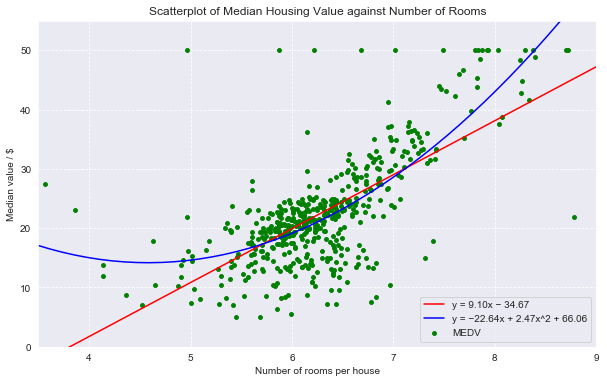

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(boston["RM"], boston["MEDV"], s=15, c="green")
plt.grid(linestyle="--")
plt.xlabel("Number of rooms per house")
plt.ylabel("Median value / $")

x_vals = np.linspace(3, 9)
y1_vals = 9.10*x_vals - 34.67
y2_vals = -22.64*x_vals + 2.47*(x_vals**2) + 66.06
plt.plot(x_vals, y1_vals, label="y = 9.10x − 34.67", c="red")
plt.plot(x_vals, y2_vals, label="y = −22.64x + 2.47x^2 + 66.06", c="blue")
plt.ylim(0,55)
plt.xlim(3.5,9)
plt.legend()
plt.title("Scatterplot of Median Housing Value against Number of Rooms")

#### First Gradient descent - one independent variable (average rooms per house)

In [53]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=10000):
    # initialize the parameters
    xvalues = np.array(xvalues)
    yvalues = np.array(yvalues)
    start_time = time.time()
    alpha = 30   # randomly selected alpha
    beta = 2     # randomly selected beta
    n = len(yvalues)
    cost = (1/(2*n)) * np.sum((alpha + beta*xvalues - yvalues)**2)
    
    count = 0
    diff_a = 1    # dummy
    diff_b = 1    # dummy
    
    while count < MaxIterations and abs(R*diff_a) > 1e-8 and abs(R*diff_b) > 1e-8:  
        diff_a = 1/n * np.sum(alpha + beta*xvalues - yvalues)
        diff_b = 1/n * np.sum((alpha + beta*xvalues - yvalues) * xvalues)
        alpha = alpha - R*diff_a
        beta = beta - R*diff_b
        count += 1
    
    post_cost =  (1/(2*n)) * np.sum((alpha + beta*xvalues - yvalues)**2)
    print("No. of Iterations: {}".format(count))
    print("Cost function after iterations {}.".format(post_cost))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))

    return alpha, beta


In [54]:
# function call test
X = boston["RM"]
Y = boston["MEDV"]

In [55]:
print('\nTest 1')
print(bivariate_ols(X, Y, 0.01, 1000))
print('\nTest 2')
print(bivariate_ols(X, Y, 0.01, 100000))
print('\nTest 3')
print(bivariate_ols(X, Y, 0.04, 100000))
print('\nTest 4')
print(bivariate_ols(X, Y, 0.02, 100000))
print('\nTest 5')
print(bivariate_ols(X, Y, 0.03, 100000))


Test 1
No. of Iterations: 1000
Cost function after iterations 41.764025246414235.
Time taken: 0.05 seconds
(22.256253642483603, 0.15291572108106702)

Test 2
No. of Iterations: 97358
Cost function after iterations 21.800275887308292.
Time taken: 3.02 seconds
(-34.67009183996098, 9.102025829684491)

Test 3
No. of Iterations: 27218
Cost function after iterations 21.800275885692383.
Time taken: 0.83 seconds
(-34.67048861496706, 9.102088204726972)

Test 4
No. of Iterations: 51559
Cost function after iterations 21.800275886015484.
Time taken: 1.56 seconds
(-34.67035636112267, 9.102067413752149)

Test 5
No. of Iterations: 35495
Cost function after iterations 21.80027588577613.
Time taken: 1.31 seconds
(-34.67044453281319, 9.102081274788901)


#### Normalization

In [56]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

 #### Second Gradient descent - with an arbitrary number of independent variables and standardized

In [66]:
def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=10000):
    
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)
    
    start_time = time.time()
    
    num_xvar = xvalue_matrix.shape[1]
    num_samples = xvalue_matrix.shape[0]
    alpha = 30    # random alpha
    beta_array = np.ones((1, num_xvar))
    x_transpose = xvalue_matrix.T

    error = alpha + (np.dot(beta_array, x_transpose)).T - yvalues
    errorsq = error**2
    sum_errorsq = np.sum(errorsq, axis=0)
    cost = 1/(2*num_samples) * sum_errorsq
    
    count = 0
    diff_a = 1    # dummy
    diff_b = 1    # dummy
    
    while count < MaxIterations and abs(R*diff_a) > 1e-8 and abs(R*diff_b) > 1e-8:  
        # differential of alpha
        diff_a = 1/num_samples * np.sum(error, axis=0)
        alpha = np.array(alpha - R*diff_a)    # update alpha

        # differential of beta array
        for i in range(num_xvar):
            x_list = np.reshape(np.array(xvalue_matrix[:,i]), (xvalue_matrix.shape[0],1))
            diff_b = 1/num_samples * (np.sum(np.array(error * x_list), axis=0))
            beta_array[0][i] = beta_array[0][i] - R*diff_b    # update each beta
    
        error = alpha + (np.dot(beta_array, x_transpose)).T - yvalues
        count += 1
        
    # calculate new cost function
    post_errorsq = error**2
    post_sum_errorsq = np.sum(post_errorsq, axis=0)
    post_cost = 1/(2*num_samples) * post_sum_errorsq
    
    print("No. of Iterations: {}".format(count))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    print("Cost function after iterations {}.".format(post_cost[0]))
    print("alpha : " + str(alpha))
    print("beta : " + str(beta_array))
    return alpha, beta_array

In [67]:
crim_rm_data = boston[["CRIM","RM"]]
stan_data = standardize(crim_rm_data)

print('\nTest 1')
multivariate_ols(stan_data, boston[["MEDV"]], R=0.1, MaxIterations=10000)
print('\nTest 2')
multivariate_ols(stan_data, boston[["MEDV"]], R=0.01, MaxIterations=10000)
print('\nTest 3')
multivariate_ols(stan_data, boston[["MEDV"]], R=0.001, MaxIterations=100000)


Test 1
No. of Iterations: 174
Time taken: 0.02 seconds
Cost function after iterations 19.394448205261924.
alpha : [22.53280641]
beta : [[-2.24860986  5.89441597]]

Test 2
No. of Iterations: 1576
Time taken: 0.16 seconds
Cost function after iterations 19.394448205272194.
alpha : [22.53280731]
beta : [[-2.24861284  5.89441296]]

Test 3
No. of Iterations: 13518
Time taken: 1.04 seconds
Cost function after iterations 19.394448205674774.
alpha : [22.53281631]
beta : [[-2.24863056  5.89439471]]


(array([22.53281631]), array([[-2.24863056,  5.89439471]]))

In [69]:
# compare above results with linear regression for reference
lr = LinearRegression()
compare_reg = lr.fit(stan_data, boston["MEDV"])
compare_predict = compare_reg.predict(stan_data)
print(compare_reg.coef_)
print(compare_reg.intercept_)
print("R-square value is {:.2f}.".format(compare_reg.score(stan_data, boston["MEDV"])))
np.sqrt(mean_squared_error(compare_predict, boston["MEDV"]))

[-2.24860926  5.89441657]
22.532806324110744
R-square value is 0.54.


6.228073250253508

#### Comparison between standardized and non-standardized run

In [71]:
# linear regression results as reference
compare_reg = lr.fit(boston[["CRIM","RM"]], boston["MEDV"])
compare_predict = compare_reg.predict(boston[["CRIM", "RM"]])
print(compare_reg.coef_)
print(compare_reg.intercept_)
print("R-square value is {:.2f}.".format(compare_reg.score(boston[["CRIM","RM"]], boston["MEDV"])))

[-0.2618229  8.3975317]
-29.301681346741116
R-square value is 0.54.


In [73]:
# non-standardized
print('\nNon-standardized 1')
multivariate_ols(boston[["CRIM", "RM"]], boston[["MEDV"]], R=0.1, MaxIterations=100)
print('\nNon-standardized 2')
multivariate_ols(boston[["CRIM", "RM"]], boston[["MEDV"]], R=0.01, MaxIterations=1000000)


Non-standardized 1
No. of Iterations: 100
Time taken: 0.02 seconds
Cost function after iterations 2.6155107243806954e+188.
alpha : [1.40003495e+92]
beta : [[2.17797420e+93 8.53968415e+92]]

Non-standardized 2
No. of Iterations: 103005
Time taken: 9.41 seconds
Cost function after iterations 19.394448207153182.
alpha : [-29.30110714]
beta : [[-0.26182481  8.39744246]]


(array([-29.30110714]), array([[-0.26182481,  8.39744246]]))

Observations:
* Longer running time for non-standardized, since more iterations are required for the same learning rate.
* With the same learning rate of 0.1, non-standardized model does not converge

#### Cross validation

In [76]:
from sklearn.metrics import mean_squared_error

kf = KFold(n=506, n_folds=25, shuffle=True, random_state=10)
cv_data = standardize(boston[["CRIM","RM"]])
cv_data["MEDV"] = boston["MEDV"]

list_vals = pd.DataFrame(columns=["alpha", "beta1", "beta2", "RMSE"])

count = 0 
for idxtrain, idxtest in kf:
    print("\nIteration " + str(count+1))
    train = cv_data.iloc[idxtrain]
    test = cv_data.iloc[idxtest]   
    alpha, beta_array = multivariate_ols(train[["CRIM", "RM"]], train[["MEDV"]], R=0.01, MaxIterations=100000)
    predicted_price = (alpha + np.dot(beta_array, test[["CRIM", "RM"]].T)).T
    rmse = np.sqrt(mean_squared_error(predicted_price, test[["MEDV"]]))
    list_vals.loc[count,"alpha"] = alpha[0]
    list_vals.loc[count,"beta1"] = beta_array[0][0]
    list_vals.loc[count,"beta2"] = beta_array[0][1]
    list_vals.loc[count,"RMSE"] = rmse
    count += 1


Iteration 1
No. of Iterations: 1567
Time taken: 0.22 seconds
Cost function after iterations 19.21957286294624.
alpha : [22.41188692]
beta : [[-2.2213797  5.7818311]]

Iteration 2
No. of Iterations: 1566
Time taken: 0.14 seconds
Cost function after iterations 19.400118412214304.
alpha : [22.49239295]
beta : [[-2.24763509  5.82859821]]

Iteration 3
No. of Iterations: 1554
Time taken: 0.15 seconds
Cost function after iterations 19.457351233300834.
alpha : [22.5538796]
beta : [[-2.19227489  5.8377996 ]]

Iteration 4
No. of Iterations: 1562
Time taken: 0.12 seconds
Cost function after iterations 18.706382150747547.
alpha : [22.40835411]
beta : [[-2.27061208  5.84005878]]

Iteration 5
No. of Iterations: 1590
Time taken: 0.14 seconds
Cost function after iterations 19.15488090288823.
alpha : [22.56807735]
beta : [[-2.40874742  6.11626968]]

Iteration 6
No. of Iterations: 1594
Time taken: 0.16 seconds
Cost function after iterations 19.420066977844755.
alpha : [22.54595664]
beta : [[-2.22303291

In [77]:
list_vals

,alpha,beta1,beta2,RMSE
0,22.4119,-2.22138,5.78183,6.89743
1,22.4924,-2.24764,5.8286,6.21864
2,22.5539,-2.19227,5.8378,6.00679
3,22.4084,-2.27061,5.84006,8.427
4,22.5681,-2.40875,6.11627,7.21561
5,22.546,-2.22303,5.8768,6.13496
6,22.5138,-2.41465,5.91122,4.36599
7,22.5867,-2.21874,5.8613,4.29695
8,22.5431,-2.1729,6.08569,10.0599
9,22.5467,-2.18489,5.90536,4.40224


In [80]:
list_vals["RMSE"].mean()

6.0596426578254885

#### With CRIM and RM used, linear regression with standardization (RMSE of 6.05) performed better the KNN with standardization (RMSE of 6.79).

### Overfitting
Intentionally overfitting with all features.

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

Step 2: Fit linear regression model

In [96]:
# Step 1 : Create all features
regular = boston.copy()
num = len(boston.columns) - 2    # remove MEDV and RM_square

for i in range(num):
    for j in range(i, num):
        colnam = regular.columns[i] + regular.columns[j]
        regular[colnam] = regular.loc[:,regular.columns[i]] * regular.loc[:,regular.columns[j]]

print(regular.shape)

cols = list(regular.columns)
cols.remove("MEDV") 
cols.remove("RM_square")
regular[cols] = standardize(regular[cols])    # standardization all columns except for MEDV

(506, 106)


In [97]:
# Step 2 : Generate train test
np.random.seed(100)
num_rows = regular.shape[0]
rand_df = regular.take(np.random.permutation(num_rows))
train_df = rand_df[:int(num_rows*0.66)]
test_df = rand_df[int(num_rows*0.66):]

In [98]:
print(train_df.shape)
print(test_df.shape)

(333, 106)
(173, 106)


In [99]:
X = train_df[cols]
Y = train_df[["MEDV"]]
reg_alpha, reg_beta = multivariate_ols(X, Y, R=0.01, MaxIterations=100000)

No. of Iterations: 1523
Time taken: 5.57 seconds
Cost function after iterations 5.767223803177475.
alpha : [22.59771484]
beta : [[ 5.68979563e-02 -1.30092012e-01  7.72261595e-01  1.14625274e-01
   3.50449989e-02  1.50683968e+00  6.21518025e-01 -3.48848685e-01
   1.12889368e+00  4.44474391e-01 -6.54595081e-02  3.91452168e-01
  -2.86922764e-01  6.20644078e-01  4.19206355e-01  3.33348976e-02
   9.87248877e-01 -4.27295870e-01 -1.19170395e+00  1.37590869e-02
  -6.86910745e-01 -1.62526823e-01 -6.54297507e-02 -2.42817713e-03
  -2.85293104e-01  6.61635553e-01  5.80074011e-01 -7.62239021e-01
   7.51900654e-01  1.06362309e-01  7.32224914e-01 -1.09824083e-01
  -5.78694635e-01  3.45879374e-01 -4.47862635e-02  1.28855459e-01
  -6.94923876e-02 -3.16212009e-01  5.18324961e-01 -8.02834697e-02
   1.96553069e-01 -4.37319437e-01  4.35956961e-01 -8.57163921e-01
   6.83948571e-01  4.88288507e-01  1.65153555e-01  5.94800170e-01
  -1.04316533e+00  1.14625274e-01 -7.64834576e-01  3.20014676e-01
   4.09877954e

In [103]:
predicted_train = (reg_alpha + np.dot(reg_beta, train_df[cols].T)).T
rmse_train = np.sqrt(mean_squared_error(predicted_train, train_df[["MEDV"]]))
print("RMSE train : {:.2f}".format(rmse_train))

predicted_test = (reg_alpha + np.dot(reg_beta, test_df[cols].T)).T
rmse_test = np.sqrt(mean_squared_error(predicted_test, test_df[["MEDV"]]))
print("RMSE test : {:.2f}".format(rmse_test))

RMSE train : 3.40
RMSE test : 3.98


### Ridge regularization

In [104]:
def ridge_multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000, lambda_coeff=1):
    
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)
    
    start_time = time.time()
    
    num_xvar = xvalue_matrix.shape[1]
    num_samples = xvalue_matrix.shape[0]
    alpha = 30    # random alpha
    beta_array = np.ones((1, num_xvar))
    x_transpose = xvalue_matrix.T

    error = alpha + (np.dot(beta_array, x_transpose)).T - yvalues
    errorsq = error**2
    sum_errorsq = np.sum(errorsq, axis=0)
    
    init_ridge = lambda_coeff * (np.sum(beta_array**2))    # added ridge
    cost = 1/(2*num_samples) * sum_errorsq + init_ridge
    
    count = 0
    diff_a = 1    # dummy
    diff_b = 1    # dummy
    
    while count < MaxIterations and abs(R*diff_a) > 1e-8 and abs(R*diff_b) > 1e-8:  
        # differential of alpha
        diff_a = 1/num_samples * np.sum(error, axis=0) 
        alpha = np.array(alpha - R*diff_a)

        # differential of beta array
        for i in range(num_xvar):
            x_list = np.reshape(np.array(xvalue_matrix[:,i]), (xvalue_matrix.shape[0],1))
            diff_b = 1/num_samples * (np.sum(np.array(error * x_list), axis=0)) + 2*lambda_coeff*beta_array[0][i]   # added ridge differential
            beta_array[0][i] = beta_array[0][i] - R*diff_b    # update each beta
    
        error = alpha + (np.dot(beta_array, x_transpose)).T - yvalues
        count += 1
    # calculate new cost function
    post_errorsq = error**2
    post_sum_errorsq = np.sum(post_errorsq, axis=0)
    post_ridge = lambda_coeff * (np.sum(beta_array**2)) 
    post_cost = 1/(2*num_samples) * post_sum_errorsq + post_ridge   # added ridge
    
    print("No. of Iterations: {}".format(count))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    print("Cost function after iterations {}.".format(post_cost[0]))
    
    return alpha, beta_array

In [105]:
X = train_df[cols]
Y = train_df[["MEDV"]]
new_alpha, new_beta = ridge_multivariate_ols(X, Y, R=0.01, MaxIterations=100000, lambda_coeff=1)

predict_ridgetrain = (new_alpha + np.dot(new_beta, train_df[cols].T)).T
rmse_train = np.sqrt(mean_squared_error(predict_ridgetrain, train_df[["MEDV"]]))
predict_ridgetest = (new_alpha + np.dot(new_beta, test_df[cols].T)).T
rmse_test = np.sqrt(mean_squared_error(predict_ridgetest, test_df[["MEDV"]]))
print("RMSE of train is {:.2f}. RMSE of test is {:.2f}.".format(rmse_train, rmse_test))

No. of Iterations: 1140
Time taken: 4.44 seconds
Cost function after iterations 16.73732953401882.
RMSE of train is 4.94. RMSE of test is 4.68.


In [106]:
new_alpha, new_beta = ridge_multivariate_ols(X, Y, R=0.01, MaxIterations=100000, lambda_coeff=0.5)

predict_ridgetrain = (new_alpha + np.dot(new_beta, train_df[cols].T)).T
rmse_train = np.sqrt(mean_squared_error(predict_ridgetrain, train_df[["MEDV"]]))
predict_ridgetest = (new_alpha + np.dot(new_beta, test_df[cols].T)).T
rmse_test = np.sqrt(mean_squared_error(predict_ridgetest, test_df[["MEDV"]]))
print("RMSE of train is {:.2f}. RMSE of test is {:.2f}.".format(rmse_train, rmse_test))

No. of Iterations: 336
Time taken: 1.36 seconds
Cost function after iterations 14.04326462665136.
RMSE of train is 4.61. RMSE of test is 4.52.


In [107]:
new_alpha, new_beta = ridge_multivariate_ols(X, Y, R=0.01, MaxIterations=100000, lambda_coeff=0.03)

predict_ridgetrain = (new_alpha + np.dot(new_beta, train_df[cols].T)).T
rmse_train = np.sqrt(mean_squared_error(predict_ridgetrain, train_df[["MEDV"]]))
predict_ridgetest = (new_alpha + np.dot(new_beta, test_df[cols].T)).T
rmse_test = np.sqrt(mean_squared_error(predict_ridgetest, test_df[["MEDV"]]))
print("RMSE of train is {:.2f}. RMSE of test is {:.2f}.".format(rmse_train, rmse_test))

No. of Iterations: 8948
Time taken: 36.02 seconds
Cost function after iterations 7.828689315742264.
RMSE of train is 3.52. RMSE of test is 3.88.


In [108]:
new_alpha, new_beta = ridge_multivariate_ols(X, Y, R=0.01, MaxIterations=100000, lambda_coeff=0)

predict_ridgetrain = (new_alpha + np.dot(new_beta, train_df[cols].T)).T
rmse_train = np.sqrt(mean_squared_error(predict_ridgetrain, train_df[["MEDV"]]))
predict_ridgetest = (new_alpha + np.dot(new_beta, test_df[cols].T)).T
rmse_test = np.sqrt(mean_squared_error(predict_ridgetest, test_df[["MEDV"]]))
print("RMSE of train is {:.2f}. RMSE of test is {:.2f}.".format(rmse_train, rmse_test))

No. of Iterations: 1523
Time taken: 7.11 seconds
Cost function after iterations 5.767223803177475.
RMSE of train is 3.40. RMSE of test is 3.98.


### Cross-validate lambda

In [109]:
select_col =  ["CRIM", "ZN", "INDUS", "ZN", "CHAS", "NOX", "RM", "RAD", "B", "PTRATIO", "CRIMCRIM", "CRIMRM", "RMRM"]

kf = KFold(n=506, n_folds=25, shuffle=True, random_state=10)

lamb = [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]

list_results = pd.DataFrame(columns=["Lambda", "RMSE train", "RMSE test"])

count = 0

for l in lamb:
    
    rmsetrain_l = []
    rmsetest_l = []
    
    for idxtrain, idxtest in kf:
        train = regular.iloc[idxtrain]
        test = regular.iloc[idxtest]   
        alpha, beta_array = ridge_multivariate_ols(train[select_col], train["MEDV"], R=0.01, MaxIterations=10000, lambda_coeff=l)
        predicted_price = (alpha + np.dot(beta_array, test[select_col].T)).T
        predicted_train = (alpha + np.dot(beta_array, train[select_col].T)).T
        rmse_test = np.sqrt(mean_squared_error(predicted_price, test["MEDV"]))
        rmse_train = np.sqrt(mean_squared_error(predicted_train, train["MEDV"]))
        rmsetest_l.append(rmse_test)
        rmsetrain_l.append(rmse_train)
        
    ave_rmsetest = sum(rmsetest_l) / len(rmsetest_l)
    ave_rmsetrain = sum(rmsetrain_l) / len(rmsetrain_l)
    
    list_results.loc[count, "Lambda"] = l
    list_results.loc[count, "RMSE test"] = ave_rmsetest
    list_results.loc[count, "RMSE train"] = ave_rmsetrain
    count += 1

No. of Iterations: 2498
Time taken: 1.79 seconds
Cost function after iterations 13.761175397915837.
No. of Iterations: 1003
Time taken: 0.96 seconds
Cost function after iterations 14.298974888376431.
No. of Iterations: 10000
Time taken: 5.83 seconds
Cost function after iterations 13.989814932365611.
No. of Iterations: 10000
Time taken: 5.42 seconds
Cost function after iterations 13.110282255523817.
No. of Iterations: 1059
Time taken: 0.65 seconds
Cost function after iterations 14.049832762131079.
No. of Iterations: 10000
Time taken: 6.35 seconds
Cost function after iterations 13.675532123258376.
No. of Iterations: 2876
Time taken: 1.64 seconds
Cost function after iterations 14.403033119787551.
No. of Iterations: 10000
Time taken: 6.36 seconds
Cost function after iterations 14.163894529094364.
No. of Iterations: 10000
Time taken: 4.83 seconds
Cost function after iterations 12.764380421835192.
No. of Iterations: 2036
Time taken: 1.05 seconds
Cost function after iterations 14.418074083715

No. of Iterations: 1669
Time taken: 0.85 seconds
Cost function after iterations 16.779923101824345.
No. of Iterations: 1435
Time taken: 0.67 seconds
Cost function after iterations 18.30116033213714.
No. of Iterations: 1570
Time taken: 0.75 seconds
Cost function after iterations 18.20257080504263.
No. of Iterations: 1476
Time taken: 0.86 seconds
Cost function after iterations 17.94502277630863.
No. of Iterations: 1567
Time taken: 0.76 seconds
Cost function after iterations 18.16125668203083.
No. of Iterations: 1744
Time taken: 0.91 seconds
Cost function after iterations 17.40998652319482.
No. of Iterations: 1551
Time taken: 0.89 seconds
Cost function after iterations 17.87791471607668.
No. of Iterations: 1617
Time taken: 1.05 seconds
Cost function after iterations 18.166357423767366.
No. of Iterations: 1578
Time taken: 1.16 seconds
Cost function after iterations 18.157524652282348.
No. of Iterations: 1646
Time taken: 0.94 seconds
Cost function after iterations 18.249719262372427.
No. of

No. of Iterations: 923
Time taken: 0.80 seconds
Cost function after iterations 23.869056451723193.
No. of Iterations: 1087
Time taken: 0.94 seconds
Cost function after iterations 24.133007325795518.
No. of Iterations: 1007
Time taken: 0.48 seconds
Cost function after iterations 23.80830151395953.
No. of Iterations: 1015
Time taken: 0.79 seconds
Cost function after iterations 23.886732090583703.
No. of Iterations: 1060
Time taken: 0.86 seconds
Cost function after iterations 23.952748278105247.
No. of Iterations: 206
Time taken: 0.09 seconds
Cost function after iterations 24.541992448624242.
No. of Iterations: 1013
Time taken: 0.48 seconds
Cost function after iterations 23.914545593344045.
No. of Iterations: 1000
Time taken: 0.49 seconds
Cost function after iterations 24.124075772725817.
No. of Iterations: 1020
Time taken: 0.53 seconds
Cost function after iterations 22.346032584670404.
No. of Iterations: 1033
Time taken: 0.56 seconds
Cost function after iterations 24.46199412185852.
No. 

In [110]:
list_results

,Lambda,RMSE train,RMSE test
0,0.01,5.20561,5.03176
1,0.05,5.31478,5.12568
2,0.1,5.37622,5.17767
3,0.2,5.47747,5.26987
4,0.4,5.6692,5.45683
5,0.6,5.85051,5.63912
6,0.8,6.023,5.82362
7,1,6.18087,5.98641


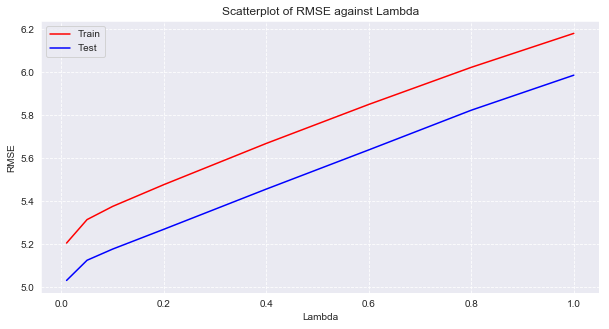

In [112]:
plt.figure(figsize=(10,5))
plt.plot(list_results["Lambda"], list_results["RMSE train"], label="Train", color="red")
plt.plot(list_results["Lambda"], list_results["RMSE test"], label="Test", color="blue")
plt.grid(linestyle='--')
plt.title("Scatterplot of RMSE against Lambda")
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.legend()

### Lambda and coefficients

In [113]:
alphas = []
features = list(boston.columns)
features.remove("MEDV")
features.remove("RM_square")
betas_df = pd.DataFrame(columns=features)

lamb = [0.001, 0.01, 0.1, 0.5, 1, 10, 50]

for l in lamb:
    alpha, beta_array = ridge_multivariate_ols(regular[features], regular[["MEDV"]], R=0.01, 
                                               MaxIterations=100000, lambda_coeff=l)
    alphas.append(alpha)
    single_beta_df = pd.DataFrame([beta_array[0]], columns=features)
    betas_df = pd.concat([betas_df, single_beta_df])

No. of Iterations: 1576
Time taken: 0.88 seconds
Cost function after iterations 11.052234409880175.
No. of Iterations: 1576
Time taken: 0.90 seconds
Cost function after iterations 11.465818247038678.
No. of Iterations: 1576
Time taken: 0.75 seconds
Cost function after iterations 14.394249676454743.
No. of Iterations: 1068
Time taken: 0.59 seconds
Cost function after iterations 20.906202850331645.
No. of Iterations: 621
Time taken: 0.34 seconds
Cost function after iterations 25.0173867363075.
No. of Iterations: 74
Time taken: 0.06 seconds
Cost function after iterations 44.00860123874648.
No. of Iterations: 8
Time taken: 0.00 seconds
Cost function after iterations 64.86931553774106.


In [114]:
betas_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.825684,0.915385,-0.143857,0.724174,-1.786911,2.791969,-0.054131,-2.907494,1.832447,-1.238731,-1.994157,0.864628,-3.688292
0,-0.796109,0.858068,-0.191962,0.730788,-1.647561,2.813161,-0.074426,-2.732240,1.642673,-1.114172,-1.949840,0.858007,-3.596976
0,-0.642370,0.573908,-0.404892,0.740453,-0.915458,2.776713,-0.174233,-1.674399,0.682339,-0.599192,-1.658245,0.782528,-2.956739
0,-0.509865,0.412455,-0.496230,0.586539,-0.454673,2.017742,-0.261440,-0.525198,-0.039321,-0.460641,-1.158566,0.567106,-1.865551
0,-0.442457,0.369061,-0.473486,0.439483,-0.389796,1.476608,-0.283088,-0.187835,-0.190428,-0.441042,-0.883413,0.449467,-1.357918
0,-0.136107,0.124685,-0.166783,0.074888,-0.144007,0.277606,-0.125192,0.067715,-0.124682,-0.160839,-0.193862,0.119947,-0.282403
0,-0.033427,0.031098,-0.041708,0.015870,-0.036662,0.061910,-0.032250,0.020606,-0.032559,-0.040364,-0.044757,0.029004,-0.065041


Text(0.5,1,'Plot of Coefficient against Lambda')

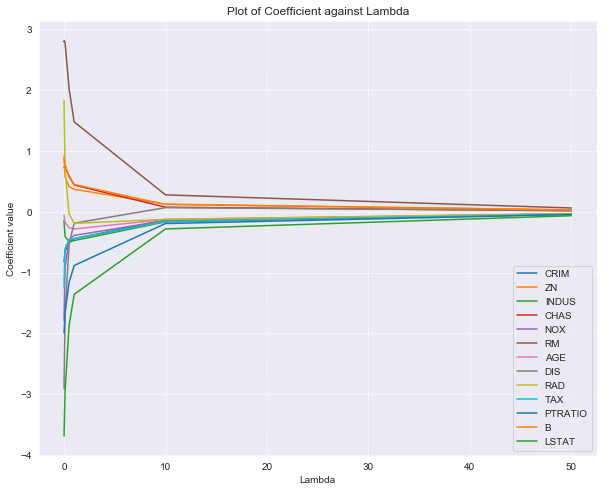

In [115]:
plt.figure(figsize=(10,8))

for i in range(len(betas_df.columns)):
    colname = betas_df.columns[i]
    plt.plot(lamb, betas_df[colname], label=colname)

# plt.plot(lamb, alphas, label="alpha")
plt.grid(linestyle='--')
plt.legend()
plt.ylabel("Coefficient value")
plt.xlabel("Lambda")
plt.title("Plot of Coefficient against Lambda")